# importing dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

# data collection

In [2]:
#loading the diabetes dataset to pandas dataframe

diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
pd.read_csv? #help

SyntaxError: invalid syntax (Temp/ipykernel_1972/4150072473.py, line 1)

<AxesSubplot:xlabel='Pregnancies', ylabel='Glucose'>

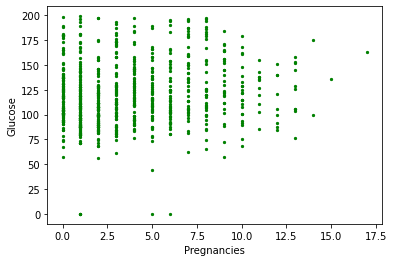

In [6]:
diabetes_df.plot.scatter(x = 'Pregnancies', y = 'Glucose', s = 5, c='green')

In [9]:
#check for null values

diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
#rows and columns

diabetes_df.shape

(768, 9)

In [11]:
# getting the statistical measures of the data

diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# 25% of value for Glucose is less than 99

In [12]:
# to count how many examples belongs to label 0 or 1

diabetes_df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0 --> Non diabetic
1 --> Diabetic

In [13]:
# mean values of all the attributes belonging to the label 0 and 1

diabetes_df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [14]:
# separating data and labels

X = diabetes_df.drop(columns = 'Outcome', axis = 1) #axis = 1 since we are dropping the colums else axis = 0 for rows
Y = diabetes_df['Outcome']

In [ ]:
Y.head()

# data standardization

In [15]:
scaler = StandardScaler()

In [16]:
scaler.fit(X)

StandardScaler()

In [17]:
standardized_data = scaler.transform(X)

In [18]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [19]:
X = standardized_data

# train test split

In [20]:
# 20% test data and 80% training data --> test_size = 0.2
# stratify = y --> equal proportion for both label

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, stratify = Y, random_state = 2)

In [21]:
X_train.shape

(614, 8)

In [22]:
X_test.shape

(154, 8)

# training the model

In [23]:
classifier = svm.SVC(kernel = 'linear')

In [24]:
#training the support vector machine classifier

classifier.fit(X_train, Y_train)

SVC(kernel='linear')

# model evaluation

In [25]:
#accuracy score

X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [26]:
print ('Accuracy score of the training data {}'.format(training_data_accuracy))

Accuracy score of the training data 0.7866449511400652


In [27]:
#accuracy score for test data

X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [28]:
print ('Accuracy score of the test data {}'.format(test_data_accuracy))

Accuracy score of the test data 0.7727272727272727



# make a predictive system

In [30]:
input_data = (8,65,72,23,0,32,0.6,42)

# changing the input data to numpy array

input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting for one instance

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data

standard_data = scaler.transform(input_data_reshaped)
print (standard_data)

[[ 1.23388019e+00 -1.74933927e+00  1.49640753e-01  1.54533192e-01
  -6.92890572e-01  9.41978774e-04  3.86948773e-01  7.45293379e-01]]


In [31]:
prediction = classifier.predict(standard_data)
print (prediction)

[0]


In [32]:
if (prediction[0] == 0):
    print ('The patient is non diabetic')
else:
    print ('The patient is diabetic')

The patient is non diabetic
